In [24]:
def augment_img(img):
    rotate_limit = (-45, 45)
    aspect_limit = (0, 0)
    scale_limit = (-0.1, 0.1)
    shift_limit = (-0.0625, 0.0625)
    shift_dx = np.random.uniform(shift_limit[0], shift_limit[1])
    shift_dy = np.random.uniform(shift_limit[0], shift_limit[1])
    angle = np.random.uniform(rotate_limit[0], rotate_limit[1])  # degree
    scale = np.random.uniform(1 + scale_limit[0], 1 + scale_limit[1])
    aspect = np.random.uniform(1 + aspect_limit[0], 1 + aspect_limit[1])

    img = random_shift_scale_rotate(img, angle, scale, aspect, shift_dx, shift_dy)
#     mask = random_shift_scale_rotate(mask, angle, scale, aspect, shift_dx, shift_dy)

    img = random_horizontal_flip(img)
    return img

def random_shift_scale_rotate(image, angle, scale, aspect, shift_dx, shift_dy,
                              borderMode=cv2.BORDER_CONSTANT, u=0.5):
    height, width, channels = image.shape

    sx = scale * aspect / (aspect ** 0.5)
    sy = scale / (aspect ** 0.5)
    dx = round(shift_dx * width)
    dy = round(shift_dy * height)

    cc = np.math.cos(angle / 180 * np.math.pi) * sx
    ss = np.math.sin(angle / 180 * np.math.pi) * sy
    rotate_matrix = np.array([[cc, -ss], [ss, cc]])

    box0 = np.array([[0, 0], [width, 0], [width, height], [0, height], ])
    box1 = box0 - np.array([width / 2, height / 2])
    box1 = np.dot(box1, rotate_matrix.T) + np.array([width / 2 + dx, height / 2 + dy])

    box0 = box0.astype(np.float32)
    box1 = box1.astype(np.float32)
    mat = cv2.getPerspectiveTransform(box0, box1)

    image = cv2.warpPerspective(image, mat, (width, height), flags=cv2.INTER_LINEAR,
                                borderMode=borderMode, borderValue=(0, 0, 0, 0))
        
        
    return image
def random_horizontal_flip(image, u=0.5):
    if np.random.random() < u:
        image = cv2.flip(image, 1)
    return image



In [99]:
import os
from os import listdir
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

mypath='Tomato___Late_blight'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles

import cv2

file = mypath + '/' + onlyfiles[0]

file

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt

# plt.imshow(img)

import numpy as np

late_blight_images = []

late_blight_images

for file_name in onlyfiles:
    file = mypath + '/' + file_name
    img = cv2.imread(file)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_small = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
    late_blight_images.append(augment_img(img))

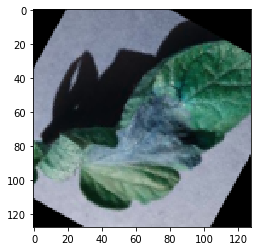

In [92]:
plt.imshow(late_blight_images[90])

In [41]:
late_blight_images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0

In [57]:
%ls

Tomato___Late_blight/ Untitled1.ipynb       blight_modified/
Tomato___healthy/     Untitled2.ipynb       healthy_modified/
Untitled.ipynb        Untitled3.ipynb       model.h5


In [100]:
import os
from os import listdir
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

mypath='Tomato___healthy/'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles

import cv2

file = mypath + '/' + onlyfiles[0]

file

img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt

# plt.imshow(img)

import numpy as np

healthy_images = []


for file_name in onlyfiles:
    file = mypath + '/' + file_name
    img = cv2.imread(file)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_small = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
    healthy_images.append(augment_img(img))

In [102]:
path = 'healthy_modified/' + 'modified_'

In [94]:
path

'blight_modified/modified_'

In [ ]:
cv2.imwrite()

In [103]:
for i in range(len(healthy_images)):
    new_path=path + str(i) + '.jpg'
    #print(new_path)
    cv2.imwrite(new_path, healthy_images[i])
    

In [79]:
ls

Tomato___Late_blight/ Untitled1.ipynb       blight_modified/
Tomato___healthy/     Untitled2.ipynb       healthy_modified/
Untitled.ipynb        Untitled3.ipynb       model.h5


In [81]:
ls

Tomato___Late_blight/ Untitled1.ipynb       blight_modified/
Tomato___healthy/     Untitled2.ipynb       healthy_modified/
Untitled.ipynb        Untitled3.ipynb       model.h5


In [83]:
cv2.imread('blight_modified/modified_1259.jpg',1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)